In [14]:
import numpy as np
import keras

In [15]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

In [16]:
import warnings

warnings.filterwarnings('ignore')

## Create the Convolutional Neural Network

In [17]:
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(64,64,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu',))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 32)         

## Create an Artificial Neural Network on top of the CNN

In [18]:
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))
model.add(Dense(units=512,activation='relu',kernel_initializer='uniform'))

In [19]:
model.add(Dense(units=1,activation='sigmoid',kernel_initializer='uniform'))
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

# summary of all the network CNN + ANN

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 4, 4, 32)         

# Image Augmentation

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [23]:
test_datagen = ImageDataGenerator(rescale=1./255)

### Set the Directory

#### "YOUR FILE PATH" is the local path of your machine where you have set up your folders for training and test sets.

In [24]:
train_set = train_datagen.flow_from_directory (
    'C:\\Users\\sowndariya\\Desktop\\dl\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\train\\',\
    target_size=(64, 64),\
    batch_size=32,\
    class_mode='binary')

Found 15 images belonging to 2 classes.


In [29]:
test_set = test_datagen.flow_from_directory(
    'C:\\Users\\sowndariya\\Desktop\\dl\\DL Paper 1\\Dataset\\ANN\\Pizza Refund\\test1\\',\
        target_size=(64, 64),\
    batch_size=32,\
    class_mode='binary')

Found 6 images belonging to 2 classes.


## Fit the Model

In [30]:
### steps_per_epoch = Total Number of images in the training set
### validation_steps = Total number of Images in the test set

In [31]:
model.fit_generator(
        train_set,
        steps_per_epoch=15,
        epochs=10,
        validation_data=test_set,
        validation_steps=6)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
 1/15 [=>............................] - 1s 685ms/step - loss: 0.6931 - accuracy: 0.5333 - val_loss: 0.6932 - val_accuracy: 0.5000


## Predicting a New Image

In [32]:
import numpy as np
from keras.preprocessing import image

In [33]:
#### Target size is 64x64 as out CNN inputs the image size as 64x64

In [37]:
new_image=image.load_img('2 - Copy.jpg',target_size=(64,64))

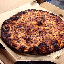

In [38]:
new_image

In [39]:
### Change the image to  numpy array

In [40]:
new_image=image.img_to_array(new_image)

In [41]:
new_image.ndim

3

In [42]:
type(new_image)

numpy.ndarray

### The input needs to be in 4 dimesnion. 4th Dim represents the batch size so add one more dimesion using the expand_dims function.

In [43]:
new_image=np.expand_dims(new_image,axis=0)

In [44]:
new_image.ndim

4

In [45]:
#### Predict the image and store it in a variable

In [46]:
result=model.predict(new_image)

In [47]:
result

array([[0.48571837]], dtype=float32)

In [48]:
train_set.class_indices

{'burnt_pizza': 0, 'good_pizza': 1}

In [49]:
result.ndim

2

In [50]:
result[0][0]

0.48571837

In [51]:
result=model.predict(new_image)
if result[0][0]==1:
    predict=print('good pizza')
else:
    predict=print('bad pizza')

bad pizza
